In [ ]:
!pip install -q pyyaml h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%matplotlib inline

import os
import shutil
import random

import numpy as np
import cv2

from PIL import Image, ImageOps
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import time


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/drive/My Drive/DR1/',
                                          target_size=(224,224),
                                          batch_size=50,
                                          class_mode = 'categorical',
                                          subset = 'training')

valid_data = datagen.flow_from_directory('/content/drive/My Drive/DR1/',
                                         target_size=(224,224),
                                 
                                         batch_size=50,
                                         class_mode = 'categorical',
                                         subset = 'validation')
train_data.class_indices

Found 3902 images belonging to 5 classes.
Found 974 images belonging to 5 classes.


{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}

In [ ]:
!pip install -q efficientnet


     |████████████████████████████████| 51kB 3.3MB/s 


In [ ]:
import efficientnet.tfkeras as efn

In [ ]:
model5b = tf.keras.Sequential([
        efn.EfficientNetB3(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
model5b.summary()

44113920/44107200 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Functional) (None, 7, 7, 1536)        10783528  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 7685      
Total params: 10,791,213
Trainable params: 10,703,917
Non-trainable params: 87,296
_________________________________________________________________


In [ ]:
mcB3 = ModelCheckpoint('2best_modelB3b.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model5b.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model5b.fit(train_data,
            validation_data = valid_data,
            
            epochs = 30,
            
            verbose = 1,
            callbacks = mcB3)

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 1.2597 - acc: 0.4634 
Epoch 00001: val_acc improved from -inf to 0.40246, saving model to 2best_modelB3b.h5
79/79 [==============================] - 1617s 20s/step - loss: 1.2597 - acc: 0.4634 - val_loss: 1.3901 - val_acc: 0.4025
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 0.9413 - acc: 0.6181
Epoch 00002: val_acc improved from 0.40246 to 0.46099, saving model to 2best_modelB3b.h5
79/79 [==============================] - 85s 1s/step - loss: 0.9413 - acc: 0.6181 - val_loss: 1.2324 - val_acc: 0.4610
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.7970 - acc: 0.6802
Epoch 00003: val_acc improved from 0.46099 to 0.53388, saving model to 2best_modelB3b.h5
79/79 [==============================] - 85s 1s/step - loss: 0.7970 - acc: 0.6802 - val_loss: 1.0703 - val_acc: 0.5339
Epoch 4/30
79/79 [==============================] - ETA: 0s - loss: 0.6841 - acc: 0.7317
Epoch 00004: val_ac

In [ ]:
new_model = tf.keras.models.load_model('2best_modelB3b.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Functional) (None, 7, 7, 1536)        10783528  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 7685      
Total params: 10,791,213
Trainable params: 10,703,917
Non-trainable params: 87,296
_________________________________________________________________


(224, 224, 3)
(1, 224, 224, 3)


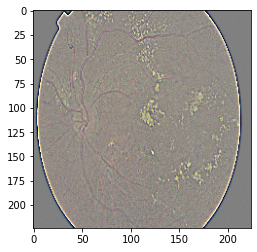

In [ ]:
img = cv2.imread('/content/drive/My Drive/DR/Severe/0.png')
img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (224, 224))
new_array = new_array/255

print(new_array.shape)
x = np.expand_dims(new_array, axis=0)
print(x.shape)
plt.imshow(new_array)

# New Section

In [ ]:
y = new_model.predict(valid_data)
y_classes = y.argmax(axis=-1)
y_classes


array([3, 1, 2, 0, 3, 2, 3, 4, 0, 3, 0, 0, 3, 4, 0, 2, 2, 1, 0, 4, 3, 2,
       1, 0, 4, 3, 2, 0, 1, 4, 3, 2, 2, 0, 1, 3, 1, 3, 4, 2, 4, 0, 0, 1,
       3, 1, 0, 3, 4, 1, 4, 1, 1, 2, 2, 4, 3, 4, 0, 3, 4, 3, 4, 4, 4, 1,
       3, 3, 1, 3, 2, 3, 4, 0, 0, 4, 4, 2, 0, 1, 0, 1, 3, 1, 0, 1, 3, 4,
       2, 0, 4, 4, 4, 1, 0, 0, 4, 0, 1, 3, 0, 2, 4, 1, 3, 0, 2, 0, 4, 0,
       3, 2, 3, 4, 3, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 3, 2, 0,
       4, 2, 2, 1, 0, 1, 2, 2, 4, 3, 2, 2, 3, 0, 2, 0, 2, 4, 3, 0, 4, 2,
       4, 2, 2, 1, 1, 1, 0, 1, 4, 2, 2, 3, 3, 1, 2, 0, 3, 3, 2, 0, 4, 2,
       4, 0, 0, 1, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 0, 4, 4, 3, 0, 3, 1, 4,
       4, 0, 3, 3, 0, 1, 4, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 2, 1, 4, 0, 0,
       2, 0, 0, 4, 0, 0, 4, 3, 2, 3, 0, 2, 2, 4, 0, 1, 0, 2, 4, 2, 2, 4,
       3, 0, 3, 1, 3, 4, 3, 4, 3, 0, 1, 0, 0, 3, 0, 4, 4, 1, 0, 1, 1, 2,
       2, 3, 3, 0, 3, 1, 0, 4, 0, 3, 1, 2, 3, 0, 0, 4, 2, 0, 1, 2, 1, 4,
       0, 4, 3, 1, 0, 1, 4, 3, 0, 0, 4, 0, 0, 0, 0,

In [ ]:
from matplotlib import pyplot
def results_summary(hist):
    pyplot.subplot(2,1,1)
    pyplot.title('Loss')
    pyplot.plot(hist.history['loss'], color='blue',label='Train')
    pyplot.plot(hist.history['val_loss'], color='orange', label='Validation')
    pyplot.subplot(2,1,2)
    pyplot.title('Accuracy')
    pyplot.plot(hist.history['acc'], color='blue', label='Train')
    pyplot.plot(hist.history['val_acc'], color='orange', label = 'Validation')
    pyplot.show()

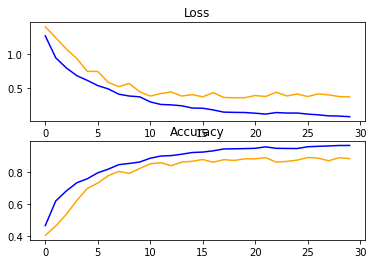

In [ ]:
results_summary(history)